MENGAMBIL DATA PERKIRAAN CUACA SELAMA 7 HARI (PERIODE 27 SEPTEMBER-3 OKTOBER

In [72]:
import requests
import pandas as pd
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

# --- KONFIGURASI ---
# Koordinat Pulau Gili Ketapang
LAT = -7.80
LON = 113.24

# Tentukan rentang tanggal yang diinginkan
start_date = "2025-09-27"
end_date = "2025-10-10"

# Tentukan parameter yang ingin diambil
params = "temperature_2m,relativehumidity_2m,windspeed_10m,winddirection_10m,windgusts_10m,precipitation,surface_pressure,uv_index,direct_normal_irradiance,visibility,weathercode,cloudcover"

# URL API Open-Meteo
api_url = f"https://api.open-meteo.com/v1/forecast?latitude={LAT}&longitude={LON}&hourly={params}&start_date={start_date}&end_date={end_date}"

# --- PROSES PENGAMBILAN DATA ---
try:
    response = requests.get(api_url)
    response.raise_for_status()
    data = response.json()

    # Open-Meteo memberikan data dalam format yang berbeda, pandas bisa langsung membacanya
    df = pd.DataFrame(data['hourly'])

    # Ganti nama kolom agar lebih mudah dibaca
    df = df.rename(columns={
        'time': 'datetime',
        'temperature_2m': 'temp',
        'relativehumidity_2m': 'humidity',
        'windspeed_10m': 'windspeed',
        'winddirection_10m': 'winddir',
        'windgusts_10m': 'windgust',
        'precipitation': 'precip',
        'surface_pressure': 'sealevelpressure',
        'uv_index': 'uvindex',
        'direct_normal_irradiance': 'solarradiation',
         'visibility': 'visibility(m)',
        'weathercode': 'weathercode',
        'cloudcover' : 'cloudcover'
    })

    # Tampilkan DataFrame
    print("Prakiraan Cuaca per Jam dari Open-Meteo:")
    display(df)

except Exception as e:
    print(f"Terjadi error: {e}")

MessageError: Error: credential propagation was unsuccessful

In [66]:
# --- FUNGSI-FUNGSI ---

def convert_weathercode_to_wmo(code):
    """Menerjemahkan weathercode numerik menjadi deskripsi teks standar WMO."""
    wmo_map = {
        0: "Clear sky",
        1: "Mainly clear",
        2: "Partly cloudy",
        3: "Overcast",
        45: "Fog",
        48: "Depositing rime fog",
        51: "Drizzle: Light intensity",
        53: "Drizzle: Moderate intensity",
        55: "Drizzle: Dense intensity",
        61: "Rain: Slight intensity",
        63: "Rain: Moderate intensity",
        65: "Rain: Heavy intensity",
        66: "Freezing Rain: Light intensity",
        67: "Freezing Rain: Heavy intensity",
        71: "Snow fall: Slight intensity",
        73: "Snow fall: Moderate intensity",
        75: "Snow fall: Heavy intensity",
        77: "Snow grains",
        80: "Rain showers: Slight",
        81: "Rain showers: Moderate",
        82: "Rain showers: Violent",
        85: "Snow showers: Slight",
        86: "Snow showers: Heavy",
        95: "Thunderstorm: Slight or moderate",
        96: "Thunderstorm with slight hail",
        99: "Thunderstorm with heavy hail"
    }
    # Mengembalikan deskripsi dari map, atau 'Unknown' jika kode tidak ada
    return wmo_map.get(code, "Unknown")

In [67]:
df['conditions'] = df['weathercode'].apply(convert_weathercode_to_wmo)
df['datetime'] = pd.to_datetime(df['datetime'])

df['datetime'] = df['datetime'] + pd.Timedelta(hours=7)
display(df)

,datetime,temp,humidity,windspeed,winddir,windgust,precip,sealevelpressure,uvindex,solarradiation,visibility(m),weathercode,cloudcover,conditions
0,2025-09-27 07:00:00,28.4,58,2.5,188,11.2,0.0,1009.8,1.50,583.3,24140.0,1,26,Mainly clear
1,2025-09-27 08:00:00,30.0,54,4.9,54,11.9,0.0,1010.2,3.70,761.0,24140.0,2,51,Partly cloudy
2,2025-09-27 09:00:00,31.4,52,8.7,45,18.0,0.0,1010.2,5.95,797.2,24140.0,2,73,Partly cloudy
3,2025-09-27 10:00:00,32.7,49,10.5,41,21.2,0.0,1009.7,7.85,831.6,24140.0,2,67,Partly cloudy
4,2025-09-27 11:00:00,33.3,47,12.7,43,25.2,0.0,1008.7,9.00,730.9,24140.0,3,97,Overcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2025-10-11 02:00:00,25.3,76,12.6,183,9.7,0.0,1007.9,0.00,0.0,24140.0,2,72,Partly cloudy
332,2025-10-11 03:00:00,25.1,77,12.3,183,9.4,0.0,1008.0,0.00,0.0,24140.0,3,82,Overcast
333,2025-10-11 04:00:00,25.3,75,12.3,183,8.6,0.0,1008.3,0.00,0.0,24140.0,3,92,Overcast
334,2025-10-11 05:00:00,26.3,69,13.0,185,7.6,0.0,1008.8,0.00,0.0,24140.0,2,77,Partly cloudy


In [68]:
# Simpan DataFrame ke file CSV
df.to_csv('prakiraan_cuaca.csv', index=False)

In [69]:
path_csv = '/content/drive/MyDrive/prakiraan_cuaca.csv'
df.to_csv(path_csv, index=False)


OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive'

In [ ]:
df1 = pd.read_csv('historis_cuaca_2025-07-14_sampai_2025-07-16.csv')
df2 = pd.read_csv('historis_cuaca_2025-07-17_sampai_2025-07-31.csv')
df3 = pd.read_csv('historis_cuaca_2025-08-01_sampai_2025-08-16.csv')
df4 = pd.read_csv('historis_cuaca_2025-08-17_sampai_2025-08-31.csv')
df5 = pd.read_csv('historis_cuaca_2025-09-01_sampai_2025-09-26.csv')

In [ ]:
import requests
import pandas as pd

# --- KONFIGURASI ---
LAT = -7.80
LON = 113.24
start_date = "2025-07-14"
end_date = "2025-07-16"

# Parameter cuaca (sudah benar)
params = "temperature_2m,relativehumidity_2m,windspeed_10m,winddirection_10m,windgusts_10m,precipitation,surface_pressure,uv_index,direct_normal_irradiance,visibility,weathercode,cloudcover"

# --- BAGIAN YANG DIPERBAIKI ---
# Ubah endpoint dari /archive menjadi /forecast
api_url = f"https://api.open-meteo.com/v1/forecast?latitude={LAT}&longitude={LON}&start_date={start_date}&end_date={end_date}&hourly={params}"

# --- PROSES PENGAMBILAN DATA ---
try:
    response = requests.get(api_url)
    response.raise_for_status()
    data = response.json()

    df_2 = pd.DataFrame(data['hourly'])

    # Ganti nama kolom
    df_2 = df_2.rename(columns={
        'time': 'datetime',
        'temperature_2m': 'temp',
        'relativehumidity_2m': 'humidity',
        'windspeed_10m': 'windspeed',
        'winddirection_10m': 'winddir',
        'windgusts_10m': 'windgust',
        'precipitation': 'precip',
        'surface_pressure': 'sealevelpressure',
        'uv_index': 'uvindex',
        'direct_normal_irradiance': 'solarradiation',
         'visibility': 'visibility(m)',
        'weathercode': 'weathercode',
        'cloudcover' : 'cloudcover'
    })

    print(f"📜 Data Cuaca Historis dari {start_date} hingga {end_date}:")
    display(df_2)

except Exception as e:
    print(f"Terjadi error: {e}")

📜 Data Cuaca Historis dari 2025-07-14 hingga 2025-07-16:


,datetime,temp,humidity,windspeed,winddir,windgust,precip,sealevelpressure,uvindex,solarradiation,visibility(m),weathercode,cloudcover
0,2025-07-14T00:00,26.2,67,14.1,183,9.7,0.0,1008.7,0.55,234.9,24140.0,3,100
1,2025-07-14T01:00,28.2,58,17.6,181,8.3,0.0,1009.0,2.05,416.5,24140.0,3,100
2,2025-07-14T02:00,28.6,57,18.7,169,7.6,0.0,1008.8,2.70,230.3,24140.0,3,100
3,2025-07-14T03:00,31.0,49,21.5,162,6.8,0.0,1008.2,5.80,809.1,24140.0,1,27
4,2025-07-14T04:00,31.8,47,23.2,154,7.9,0.0,1007.6,6.95,809.5,24140.0,3,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2025-07-16T19:00,23.8,66,15.1,192,12.2,0.0,1006.7,0.00,0.0,24140.0,3,100
68,2025-07-16T20:00,23.7,67,14.8,193,11.9,0.0,1006.8,0.00,0.0,24140.0,3,100
69,2025-07-16T21:00,23.4,70,16.3,194,12.6,0.0,1007.0,0.00,0.0,24140.0,3,100
70,2025-07-16T22:00,23.2,71,15.7,191,10.8,0.0,1007.3,0.00,0.0,24140.0,3,100


In [5]:
  df_2['conditions'] = df_2['weathercode'].apply(convert_weathercode_to_wmo)
  display(df_2)

NameError: name 'df_2' is not defined

In [ ]:
# Simpan DataFrame ke file CSV
nama_file = f"historis_cuaca_{start_date}_sampai_{end_date}.csv"
df_2.to_csv(nama_file, index=False)

In [ ]:
df1 = pd.read_csv('historis_cuaca_2025-07-14_sampai_2025-07-16.csv')
df2 = pd.read_csv('historis_cuaca_2025-07-17_sampai_2025-07-31.csv')
df3 = pd.read_csv('historis_cuaca_2025-08-01_sampai_2025-08-16.csv')
df4 = pd.read_csv('historis_cuaca_2025-08-17_sampai_2025-08-31.csv')
df5 = pd.read_csv('historis_cuaca_2025-09-01_sampai_2025-09-26.csv')

In [ ]:
# pd.concat menerima sebuah list dari DataFrame yang ingin digabungkan
df_gabungan = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df_gabungan['datetime'] = pd.to_datetime(df_gabungan['datetime'])
df_gabungan = df_gabungan.sort_values(by='datetime')
display(df_gabungan)


,datetime,temp,humidity,windspeed,winddir,windgust,precip,sealevelpressure,uvindex,solarradiation,visibility(m),weathercode,cloudcover,conditions
0,2025-07-14 00:00:00,26.2,67,14.1,183,9.7,0.0,1008.7,0.55,234.9,24140.0,3,100,Overcast
1,2025-07-14 01:00:00,28.2,58,17.6,181,8.3,0.0,1009.0,2.05,416.5,24140.0,3,100,Overcast
2,2025-07-14 02:00:00,28.6,57,18.7,169,7.6,0.0,1008.8,2.70,230.3,24140.0,3,100,Overcast
3,2025-07-14 03:00:00,31.0,49,21.5,162,6.8,0.0,1008.2,5.80,809.1,24140.0,1,27,Mainly clear
4,2025-07-14 04:00:00,31.8,47,23.2,154,7.9,0.0,1007.6,6.95,809.5,24140.0,3,88,Overcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2025-09-26 19:00:00,25.3,71,8.0,188,14.4,0.0,1007.9,0.00,0.0,24140.0,1,40,Mainly clear
1796,2025-09-26 20:00:00,25.0,73,7.2,183,14.4,0.0,1008.0,0.00,0.0,24140.0,1,16,Mainly clear
1797,2025-09-26 21:00:00,24.6,75,7.3,189,13.0,0.0,1008.1,0.00,0.0,24140.0,1,25,Mainly clear
1798,2025-09-26 22:00:00,24.3,76,6.7,196,13.0,0.0,1008.6,0.00,0.0,24140.0,1,26,Mainly clear


In [ ]:
nama_file_baru = 'historisdata_Juli-September.csv'
df_gabungan.to_csv(nama_file_baru, index=False)

1. Generate Perkiraan Energi Dihasilkan (Energy PV)

In [7]:
hist_df = pd.read_csv('historisdata_Juli-September.csv')

In [8]:
import pandas as pd
import numpy as np
from google.colab import files
import io

# Kapasitas terpasang Photovoltaic dalam kW
total_capacity_kw = 758
display(hist_df)

,datetime,temp,humidity,windspeed,winddir,windgust,precip,sealevelpressure,uvindex,solarradiation,visibility(m),weathercode,cloudcover,conditions
0,2025-07-14 00:00:00,26.2,67,14.1,183,9.7,0.0,1008.7,0.55,234.9,24140.0,3,100,Overcast
1,2025-07-14 01:00:00,28.2,58,17.6,181,8.3,0.0,1009.0,2.05,416.5,24140.0,3,100,Overcast
2,2025-07-14 02:00:00,28.6,57,18.7,169,7.6,0.0,1008.8,2.70,230.3,24140.0,3,100,Overcast
3,2025-07-14 03:00:00,31.0,49,21.5,162,6.8,0.0,1008.2,5.80,809.1,24140.0,1,27,Mainly clear
4,2025-07-14 04:00:00,31.8,47,23.2,154,7.9,0.0,1007.6,6.95,809.5,24140.0,3,88,Overcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2025-09-26 19:00:00,25.3,71,8.0,188,14.4,0.0,1007.9,0.00,0.0,24140.0,1,40,Mainly clear
1796,2025-09-26 20:00:00,25.0,73,7.2,183,14.4,0.0,1008.0,0.00,0.0,24140.0,1,16,Mainly clear
1797,2025-09-26 21:00:00,24.6,75,7.3,189,13.0,0.0,1008.1,0.00,0.0,24140.0,1,25,Mainly clear
1798,2025-09-26 22:00:00,24.3,76,6.7,196,13.0,0.0,1008.6,0.00,0.0,24140.0,1,26,Mainly clear


In [9]:
hist_df['datetime'] = pd.to_datetime(hist_df['datetime'])

hist_df['datetime'] = hist_df['datetime'] + pd.Timedelta(hours=7)

In [10]:
display(hist_df)

,datetime,temp,humidity,windspeed,winddir,windgust,precip,sealevelpressure,uvindex,solarradiation,visibility(m),weathercode,cloudcover,conditions
0,2025-07-14 07:00:00,26.2,67,14.1,183,9.7,0.0,1008.7,0.55,234.9,24140.0,3,100,Overcast
1,2025-07-14 08:00:00,28.2,58,17.6,181,8.3,0.0,1009.0,2.05,416.5,24140.0,3,100,Overcast
2,2025-07-14 09:00:00,28.6,57,18.7,169,7.6,0.0,1008.8,2.70,230.3,24140.0,3,100,Overcast
3,2025-07-14 10:00:00,31.0,49,21.5,162,6.8,0.0,1008.2,5.80,809.1,24140.0,1,27,Mainly clear
4,2025-07-14 11:00:00,31.8,47,23.2,154,7.9,0.0,1007.6,6.95,809.5,24140.0,3,88,Overcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2025-09-27 02:00:00,25.3,71,8.0,188,14.4,0.0,1007.9,0.00,0.0,24140.0,1,40,Mainly clear
1796,2025-09-27 03:00:00,25.0,73,7.2,183,14.4,0.0,1008.0,0.00,0.0,24140.0,1,16,Mainly clear
1797,2025-09-27 04:00:00,24.6,75,7.3,189,13.0,0.0,1008.1,0.00,0.0,24140.0,1,25,Mainly clear
1798,2025-09-27 05:00:00,24.3,76,6.7,196,13.0,0.0,1008.6,0.00,0.0,24140.0,1,26,Mainly clear


In [11]:
def get_weather_factor_from_conditions(conditions):
    """Menentukan faktor efisiensi berdasarkan deskripsi cuaca (teks)."""
    if not isinstance(conditions, str):
        return 1.0

    conditions = conditions.lower() # Ubah ke huruf kecil

    # Logika disesuaikan dengan kategori umum di data Anda
    if 'rain' in conditions or 'thunderstorm' in conditions:
        return 0.4  # Efisiensi 40%
    elif 'overcast' in conditions:
        return 0.6  # Efisiensi 60%
    elif 'partly cloudy' in conditions:
        return 0.8  # Efisiensi 80%
    elif 'clear' in conditions: # Mencakup 'clear sky' dan 'mainly clear'
        return 1.0  # Efisiensi 100%

    # Nilai default untuk kondisi lain
    return 1.0

    # Penerapan fungsi
hist_df['weather_factor'] = hist_df['conditions'].apply(get_weather_factor_from_conditions)

2. Penyusunan Data Energy Dummy

In [12]:
hist_df['waktu'] = hist_df['datetime']
datetime = 'waktu'
hist_df[datetime] = pd.to_datetime(hist_df[datetime])
# 1. Inisialisasi faktor soiling
soiling_factor = 1.0  # Mulai dengan efisiensi 100%
daily_degradation = 0.997 # Efisiensi turun 0.3% setiap hari tanpa hujan
soiling_factors_list = []

# 2. Iterasi per hari untuk simulasi debu menumpuk dan dibersihkan hujan
for day, group in hist_df.groupby(hist_df['waktu'].dt.date):
    # Cek apakah kemarin ada hujan lebat (sebagai event pembersihan)
    # Kita anggap hujan jika 'rain' ada di 'conditions' selama lebih dari 2 jam
    hours_with_rain = group['conditions'].str.contains('rain', case=False).sum()

    if hours_with_rain > 2:
        soiling_factor = 1.0 # Efisiensi direset menjadi 100%
    else:
        # Jika tidak ada hujan pembersih, efisiensi menurun
        soiling_factor *= daily_degradation

    #  faktor untuk setiap jam di hari itu
    soiling_factors_list.extend([soiling_factor] * len(group))
# 3. Buat kolom baru di DataFrame
hist_df['hidden_soiling_factor'] = soiling_factors_list


# Basis MWH dari radiasi
hist_df['solarradiation'] = hist_df['solarradiation'].clip(lower=0)
base_mwh = (hist_df['solarradiation'] / 1000) * (total_capacity_kw / 1000) * hist_df['weather_factor']
#  Penalti Suhu
# Ubah suhu dari Celsius ke Fahrenheit DULU
temp_celsius = hist_df['temp']
temp_fahrenheit = (temp_celsius * 9/5) + 32

# SEKARANG, terapkan formula penalti Anda
temp_penalty_factor = 1.0 - (np.maximum(0, temp_fahrenheit - 77) * 0.005)

# Gabungkan semua faktor efisiensi
total_efficiency_factor = temp_penalty_factor * hist_df['hidden_soiling_factor']
# Hitung MWH Potensial
potential_mwh = base_mwh * total_efficiency_factor
#  Grid Curtailment
curtailment_threshold = potential_mwh[potential_mwh > 0].quantile(0.95)
mwh_after_curtailment = potential_mwh.clip(upper=curtailment_threshold)
#  Gangguan Acak
downtime_factor = np.ones(len(hist_df))
downtime_indices = hist_df.sample(frac=0.015).index # Tingkatkan probabilitas downtime jadi 1.5%
downtime_factor[downtime_indices] = 0
# Hitung MWH final
mwh_sebelum_noise_akhir = mwh_after_curtailment * downtime_factor

#  "mood" / noise yang saling berhubungan
autocorrelated_noise = np.zeros(len(hist_df))
# 'rho' -> seberapa kuat "memori" dari noise sebelumnya (0 s/d 1)
rho = 0.8
# 'noise_strength' -> seberapa besar fluktuasi acaknya
noise_strength = (mwh_sebelum_noise_akhir.mean() * 0.05) # Noise sebesar 5% dari rata-rata output

for i in range(1, len(hist_df)):
    # Nilai noise saat ini = (sedikit dari nilai noise kemarin) + (sedikit noise acak baru)
    autocorrelated_noise[i] = rho * autocorrelated_noise[i-1] + np.random.normal(0, noise_strength)

#  noise   "mood"
hist_df['MWH_dihasilkan'] = mwh_sebelum_noise_akhir + autocorrelated_noise
#  tidak ada energi negatif
hist_df['MWH_dihasilkan'] = hist_df['MWH_dihasilkan'].clip(lower=0)

kolom_hasil = [
    'datetime', 'tahun',	'bulan',	'hari',	'jam','temp', 'humidity', 'cloudcover', 'precip',	'windgust',	'windspeed',	'winddir',	'sealevelpressure','visibility','solarradiation', 'uvindex','conditions', 'weather_factor', 'MWH_dihasilkan'
]
kolom_tampil = [kolom for kolom in kolom_hasil if kolom in hist_df.columns]
hasil_df = hist_df[kolom_tampil]

In [13]:
print(hasil_df.head())
nama_file_output = 'datawithPVenergy.csv'
hasil_df.to_csv(nama_file_output, index=False)

             datetime  temp  humidity  cloudcover  precip  windgust  \
0 2025-07-14 07:00:00  26.2        67         100     0.0       9.7   
1 2025-07-14 08:00:00  28.2        58         100     0.0       8.3   
2 2025-07-14 09:00:00  28.6        57         100     0.0       7.6   
3 2025-07-14 10:00:00  31.0        49          27     0.0       6.8   
4 2025-07-14 11:00:00  31.8        47          88     0.0       7.9   

   windspeed  winddir  sealevelpressure  solarradiation  uvindex  \
0       14.1      183            1008.7           234.9     0.55   
1       17.6      181            1009.0           416.5     2.05   
2       18.7      169            1008.8           230.3     2.70   
3       21.5      162            1008.2           809.1     5.80   
4       23.2      154            1007.6           809.5     6.95   

     conditions  weather_factor  MWH_dihasilkan  
0      Overcast             0.6        0.105362  
1      Overcast             0.6        0.172785  
2      Overcas

A. Solar Machine Learning Modelling

In [14]:
# Initial Imports
import requests
import json
import pandas as pd
from google.colab import files
import io

# Data manipulation
import pandas as pd
import numpy as np

# datetime
from datetime import datetime
from datetime import timedelta

# ML Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt
from pickle import dump
from pickle import load

# don't show warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
solar_df = pd.read_csv('datawithPVenergy.csv')

In [16]:
solar_df.head()

,datetime,temp,humidity,cloudcover,precip,windgust,windspeed,winddir,sealevelpressure,solarradiation,uvindex,conditions,weather_factor,MWH_dihasilkan
0,2025-07-14 07:00:00,26.2,67,100,0.0,9.7,14.1,183,1008.7,234.9,0.55,Overcast,0.6,0.105362
1,2025-07-14 08:00:00,28.2,58,100,0.0,8.3,17.6,181,1009.0,416.5,2.05,Overcast,0.6,0.172785
2,2025-07-14 09:00:00,28.6,57,100,0.0,7.6,18.7,169,1008.8,230.3,2.70,Overcast,0.6,0.074511
3,2025-07-14 10:00:00,31.0,49,27,0.0,6.8,21.5,162,1008.2,809.1,5.80,Mainly clear,1.0,0.553672
4,2025-07-14 11:00:00,31.8,47,88,0.0,7.9,23.2,154,1007.6,809.5,6.95,Overcast,0.6,0.324983


1. Preprocessing

In [17]:
solar_df['datetime'] = pd.to_datetime(solar_df['datetime'])

In [18]:
solar_df['datetime'] = pd.to_datetime(solar_df['datetime'])
solar_df['tahun'] = solar_df['datetime'].dt.year
solar_df['bulan'] = solar_df['datetime'].dt.month
solar_df['hari'] = solar_df['datetime'].dt.day
solar_df['jam'] = solar_df['datetime'].dt.hour

display(solar_df[['datetime', 'tahun', 'bulan', 'hari', 'jam']].head())

,datetime,tahun,bulan,hari,jam
0,2025-07-14 07:00:00,2025,7,14,7
1,2025-07-14 08:00:00,2025,7,14,8
2,2025-07-14 09:00:00,2025,7,14,9
3,2025-07-14 10:00:00,2025,7,14,10
4,2025-07-14 11:00:00,2025,7,14,11


In [19]:
solar_df.head()

,datetime,temp,humidity,cloudcover,precip,windgust,windspeed,winddir,sealevelpressure,solarradiation,uvindex,conditions,weather_factor,MWH_dihasilkan,tahun,bulan,hari,jam
0,2025-07-14 07:00:00,26.2,67,100,0.0,9.7,14.1,183,1008.7,234.9,0.55,Overcast,0.6,0.105362,2025,7,14,7
1,2025-07-14 08:00:00,28.2,58,100,0.0,8.3,17.6,181,1009.0,416.5,2.05,Overcast,0.6,0.172785,2025,7,14,8
2,2025-07-14 09:00:00,28.6,57,100,0.0,7.6,18.7,169,1008.8,230.3,2.70,Overcast,0.6,0.074511,2025,7,14,9
3,2025-07-14 10:00:00,31.0,49,27,0.0,6.8,21.5,162,1008.2,809.1,5.80,Mainly clear,1.0,0.553672,2025,7,14,10
4,2025-07-14 11:00:00,31.8,47,88,0.0,7.9,23.2,154,1007.6,809.5,6.95,Overcast,0.6,0.324983,2025,7,14,11


In [20]:
# Hitung jumlah missing values di setiap kolom
missing_values = solar_df.isnull().sum()

print("--- Jumlah Missing Values per Kolom ---")
# Tampilkan hanya kolom yang memiliki missing values
print(missing_values[missing_values > 0])

--- Jumlah Missing Values per Kolom ---
Series([], dtype: int64)


2. Pemodelan RLB untuk Solar

In [21]:
# Define X and Ys
X = solar_df.drop(["MWH_dihasilkan", 'datetime','solarradiation','conditions','weather_factor','windgust','windspeed','winddir','sealevelpressure','tahun','hari'], axis=1)
y = solar_df["MWH_dihasilkan"].ravel()

# Train
regr = LinearRegression()
regr.fit(X,y)

# Test
y_pred = regr.predict(X)

# accuracy
accuracy = regr.score(X,y)
print('Accuracy:',accuracy*100,'%')

Accuracy: 77.72370020719184 %


In [22]:
# Create dataframe
regression_results = pd.DataFrame()
regression_results['datetime'] = solar_df['datetime']
regression_results['tahun'] = solar_df['tahun']
regression_results['bulan'] = solar_df['bulan']
regression_results['hari'] = solar_df['hari']
regression_results['jam'] = solar_df['jam']
regression_results['test'] = y
regression_results['pred'] = y_pred
regression_results = regression_results.set_index(regression_results['datetime']).drop('datetime', axis=1)
regression_results

,tahun,bulan,hari,jam,test,pred
datetime,,,,,,
2025-07-14 07:00:00,2025,7,14,7,0.105362,0.051979
2025-07-14 08:00:00,2025,7,14,8,0.172785,0.153354
2025-07-14 09:00:00,2025,7,14,9,0.074511,0.181066
2025-07-14 10:00:00,2025,7,14,10,0.553672,0.443894
2025-07-14 11:00:00,2025,7,14,11,0.324983,0.407138
...,...,...,...,...,...,...
2025-09-27 02:00:00,2025,9,27,2,0.000838,0.029269
2025-09-27 03:00:00,2025,9,27,3,0.001915,0.052892
2025-09-27 04:00:00,2025,9,27,4,0.003879,0.025271


Output linear regression bisa negatif, sehingga akan direplace nilai negatif dengan 0

In [23]:
regression_results[regression_results < 0] = 0
regression_results

,tahun,bulan,hari,jam,test,pred
datetime,,,,,,
2025-07-14 07:00:00,2025,7,14,7,0.105362,0.051979
2025-07-14 08:00:00,2025,7,14,8,0.172785,0.153354
2025-07-14 09:00:00,2025,7,14,9,0.074511,0.181066
2025-07-14 10:00:00,2025,7,14,10,0.553672,0.443894
2025-07-14 11:00:00,2025,7,14,11,0.324983,0.407138
...,...,...,...,...,...,...
2025-09-27 02:00:00,2025,9,27,2,0.000838,0.029269
2025-09-27 03:00:00,2025,9,27,3,0.001915,0.052892
2025-09-27 04:00:00,2025,9,27,4,0.003879,0.025271


Visualisasi Pemodelan RLB

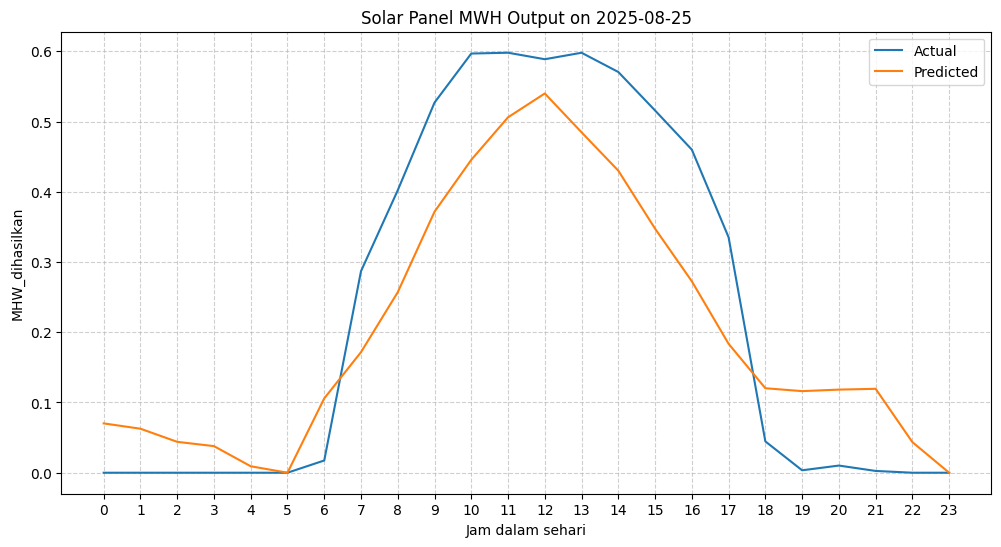

In [24]:
# Plot the test and predicted val
datetime = '2025-08-25'
day_df = regression_results[datetime:datetime]
day_df.reset_index(drop=True, inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(day_df['jam'],day_df['test'], label = 'Actual')
plt.plot(day_df['jam'],day_df['pred'], label = 'Predicted')
plt.ylabel('MHW_dihasilkan')
plt.xlabel('Jam dalam sehari')
plt.xticks(day_df['jam'])
plt.title(f'Solar Panel MWH Output on {datetime}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("solar_linear_regression")
plt.show()


Akurasi pada Data Latih (3 minggu pertama): 77.57%
Akurasi pada Data Uji (1 minggu terakhir): 77.49%
HASIL VALID: Performa model konsisten. Model tidak overfitting.


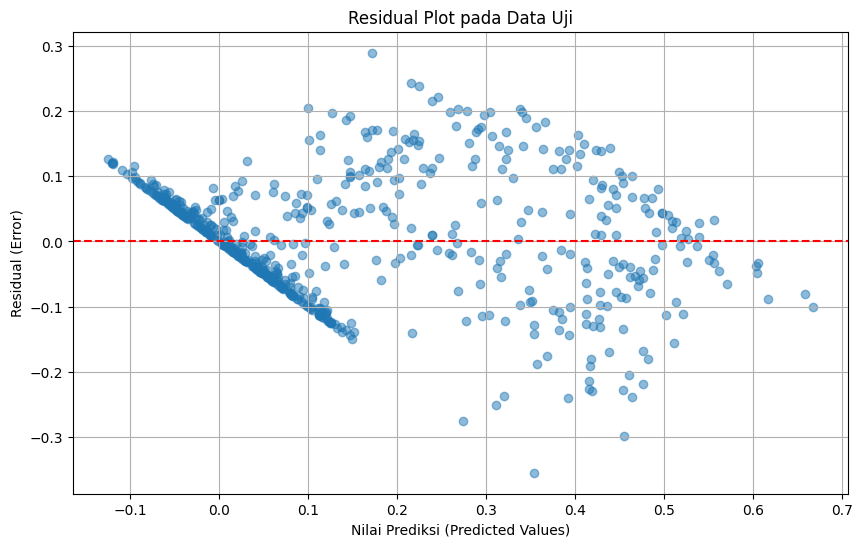

In [25]:
#COBA RIDGE REGRESSION
X = solar_df.drop(["MWH_dihasilkan", 'datetime','solarradiation','conditions','weather_factor','windgust','windspeed','winddir','sealevelpressure','tahun','hari'], axis=1)
y = solar_df["MWH_dihasilkan"].ravel()


split_date = '2025-09-01'
train_indices = solar_df['datetime'] < split_date
test_indices = solar_df['datetime'] >= split_date

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# 3. LLatih model
regr_validated = LinearRegression()
regr_validated.fit(X_train, y_train)

# 4. Evaluasi performa
accuracy_train = regr_validated.score(X_train, y_train)
accuracy_test = regr_validated.score(X_test, y_test)

print("\n" + "="*50)
print(f"Akurasi pada Data Latih (3 minggu pertama): {accuracy_train * 100:.2f}%")
print(f"Akurasi pada Data Uji (1 minggu terakhir): {accuracy_test * 100:.2f}%")
print("="*50)

if abs(accuracy_train - accuracy_test) < 0.05: # Jika selisih < 5%
    print("HASIL VALID: Performa model konsisten. Model tidak overfitting.")
else:
    print("warning: Performa model turun drastis pada data baru. Model mungkin overfitting.")

    # 1. prediksi data uji
y_pred_test = regr_validated.predict(X_test)

# 2.  residual
residuals = y_test - y_pred_test

# 3.  Residual Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Nilai Prediksi (Predicted Values)")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot pada Data Uji")
plt.grid(True)
plt.show()


3. Pemodelan Neural Network untuk Solar

In [26]:
# features set

X = solar_df.drop(["MWH_dihasilkan", 'datetime', 'solarradiation','conditions','weather_factor','windgust','windspeed','winddir','sealevelpressure','tahun','hari'], axis=1)
y = solar_df[["MWH_dihasilkan"]]

# Bagi data jd Latih (85%) dan Uji (15%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, shuffle=False # shuffle=False PENTING untuk time series
)

# Bagi  data latih lagi jd Latih (70%) dan Validasi (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.176, shuffle=False # 0.176 * 0.85 ≈ 0.15
)

# Scaling data
scaler = StandardScaler()
# Latih scaler  pada data training
X_train_scaled = scaler.fit_transform(X_train)
# Terapkan scaler yang sama
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [27]:
X

,temp,humidity,cloudcover,precip,uvindex,bulan,jam
0,26.2,67,100,0.0,0.55,7,7
1,28.2,58,100,0.0,2.05,7,8
2,28.6,57,100,0.0,2.70,7,9
3,31.0,49,27,0.0,5.80,7,10
4,31.8,47,88,0.0,6.95,7,11
...,...,...,...,...,...,...,...
1795,25.3,71,40,0.0,0.00,9,2
1796,25.0,73,16,0.0,0.00,9,3
1797,24.6,75,25,0.0,0.00,9,4
1798,24.3,76,26,0.0,0.00,9,5


In [28]:
X_train_scaled

array([[-0.27704842,  0.35466751,  1.62115154, ..., -0.55157683,
        -1.26175838, -0.65373791],
       [ 0.37011697, -0.37939519,  1.62115154, ..., -0.03868406,
        -1.26175838, -0.50876963],
       [ 0.49955005, -0.46095771,  1.62115154, ...,  0.18356948,
        -1.26175838, -0.36380135],
       ...,
       [ 0.72605794, -0.37939519, -0.20682626, ...,  0.18356948,
         2.17196854,  0.6509766 ],
       [ 0.30540043,  0.10997994, -0.20682626, ..., -0.43190185,
         2.17196854,  0.79594488],
       [-0.05054054,  0.35466751,  0.39297896, ..., -0.72254109,
         2.17196854,  0.94091316]])

Training Model

In [29]:
# deep neural net
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  number_input_features*5
hidden_nodes_layer2 =  number_input_features*4
hidden_nodes_layer3 =  number_input_features*3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="linear"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Compile the Sequential model
nn.compile(loss='mse', optimizer='sgd', metrics=['mse','mae'])

#summary of the model
nn.summary()

# Train  model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 35)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │           609 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,919 (7.50 KB)

 Trainable params: 1,919 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0752 - mae: 0.1999 - mse: 0.0752
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0299 - mae: 0.1208 - mse: 0.0299
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0236 - mae: 0.1047 - mse: 0.0236
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 - mae: 0.0864 - mse: 0.0173
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mae: 0.0812 - mse: 0.0152
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mae: 0.0812 - mse: 0.0153
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mae: 0.0694 - mse: 0.0115
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - mae: 0.0671 - mse: 0.0110
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - mae: 0.0621 - mse: 0.0096
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - mae: 0.0592 - mse: 0.0088
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [30]:
# Predict values for test set

y_pred = nn.predict(X_test_scaled)
accuracy_test_nn = r2_score(y_test, y_pred)

print("\n" + "="*50)
print(f"Akurasi R-squared Neural Network pada Data Uji: {accuracy_test_nn * 100:.2f}%")
print("="*50)

test_index = y_test.index
test_df_correct = solar_df.loc[test_index].copy()

# 1. Ambil baris data asli yang termasuk dalam set Uji
test_df = solar_df[test_indices].copy()

nn_results = pd.DataFrame(index=test_df_correct.index)
nn_results['datetime'] = solar_df['datetime']
nn_results['jam'] = test_df_correct['jam']
nn_results['test'] = y_test
nn_results['pred'] = y_pred.flatten()

# 3. Set 'datetime' sebagai index agar bisa difilter berdasarkan tanggal
nn_results = nn_results.set_index('datetime')

print("DataFrame 'nn_results' berhasil dibuat:")
print(nn_results.head())


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Akurasi R-squared Neural Network pada Data Uji: 90.09%
DataFrame 'nn_results' berhasil dibuat:
                     jam  test  pred
datetime                            
2025-09-16 01:00:00    1   0.0   0.0
2025-09-16 02:00:00    2   0.0   0.0
2025-09-16 03:00:00    3   0.0   0.0
2025-09-16 04:00:00    4   0.0   0.0
2025-09-16 05:00:00    5   0.0   0.0



Membuat plot untuk tanggal: 2025-09-22...


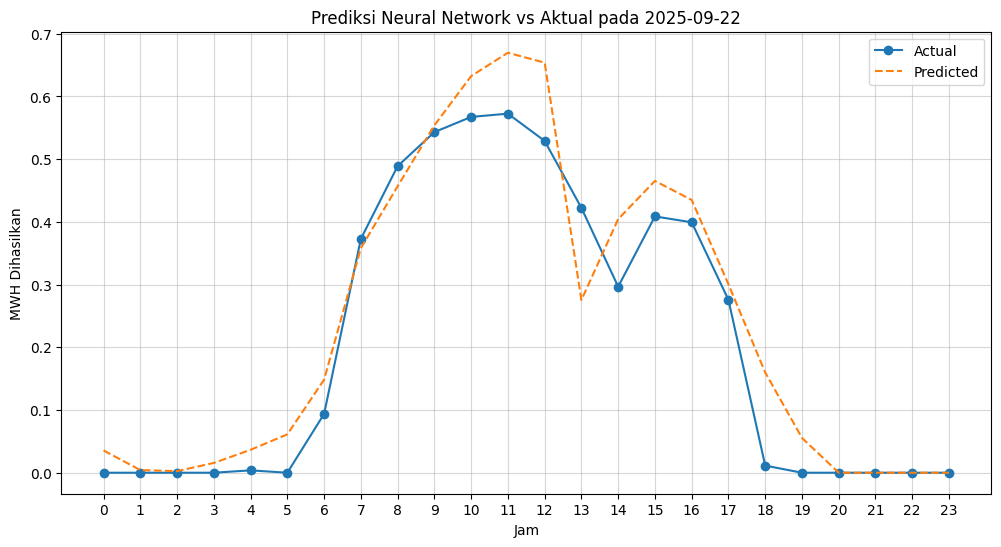

In [31]:
waktu = '2025-09-22'
try:
    day_df = nn_results.loc[waktu]

    if not day_df.empty:
        print(f"\nMembuat plot untuk tanggal: {waktu}...")

        plt.figure(figsize=(12, 6))
        plt.plot(day_df['jam'], day_df['test'], label = 'Actual', marker='o')
        plt.plot(day_df['jam'], day_df['pred'], label = 'Predicted', linestyle='--')

        plt.ylabel('MWH Dihasilkan')
        plt.xlabel('Jam')
        plt.xticks(day_df['jam'])
        plt.title(f'Prediksi Neural Network vs Aktual pada {waktu}')
        plt.legend()
        plt.grid(True, alpha=0.5)
        plt.savefig('solar_neural_network')
        plt.show()
    else:
        print(f"\nTidak ada data yang ditemukan untuk tanggal {waktu}.")

except KeyError:
    print(f"\nERROR: Tanggal {waktu} tidak ditemukan di dalam indeks data uji.")


In [32]:
import joblib # Impor library joblib
nn.save('model_prediksi_solar.keras')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Prediksi Energi Surya (KWH) Dihasilkan berdasrakan model NN

In [33]:
file_model = 'model_prediksi_solar.keras'
file_scaler = 'scaler.pkl'

In [34]:
prediksi = pd.read_csv('prakiraan_cuaca.csv')

In [35]:
prediksi['datetime'] = pd.to_datetime(prediksi['datetime'])

In [36]:
prediksi['datetime'] = pd.to_datetime(prediksi['datetime'])
prediksi['tahun'] = prediksi['datetime'].dt.year
prediksi['bulan'] = prediksi['datetime'].dt.month
prediksi['hari'] = prediksi['datetime'].dt.day
prediksi['jam'] = prediksi['datetime'].dt.hour

display(prediksi[['datetime', 'tahun', 'bulan', 'hari', 'jam']].head())

,datetime,tahun,bulan,hari,jam
0,2025-09-27 07:00:00,2025,9,27,7
1,2025-09-27 08:00:00,2025,9,27,8
2,2025-09-27 09:00:00,2025,9,27,9
3,2025-09-27 10:00:00,2025,9,27,10
4,2025-09-27 11:00:00,2025,9,27,11


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Waktu_Prakiraan,Prediksi_KWh_Dihasilkan
0,2025-09-27 07:00:00,0.293610
1,2025-09-27 08:00:00,0.296656
2,2025-09-27 09:00:00,0.276443
3,2025-09-27 10:00:00,0.398372
4,2025-09-27 11:00:00,0.259850



Grafik prediksi berhasil disimpan sebagai 'hasil_prediksi_energi.png'


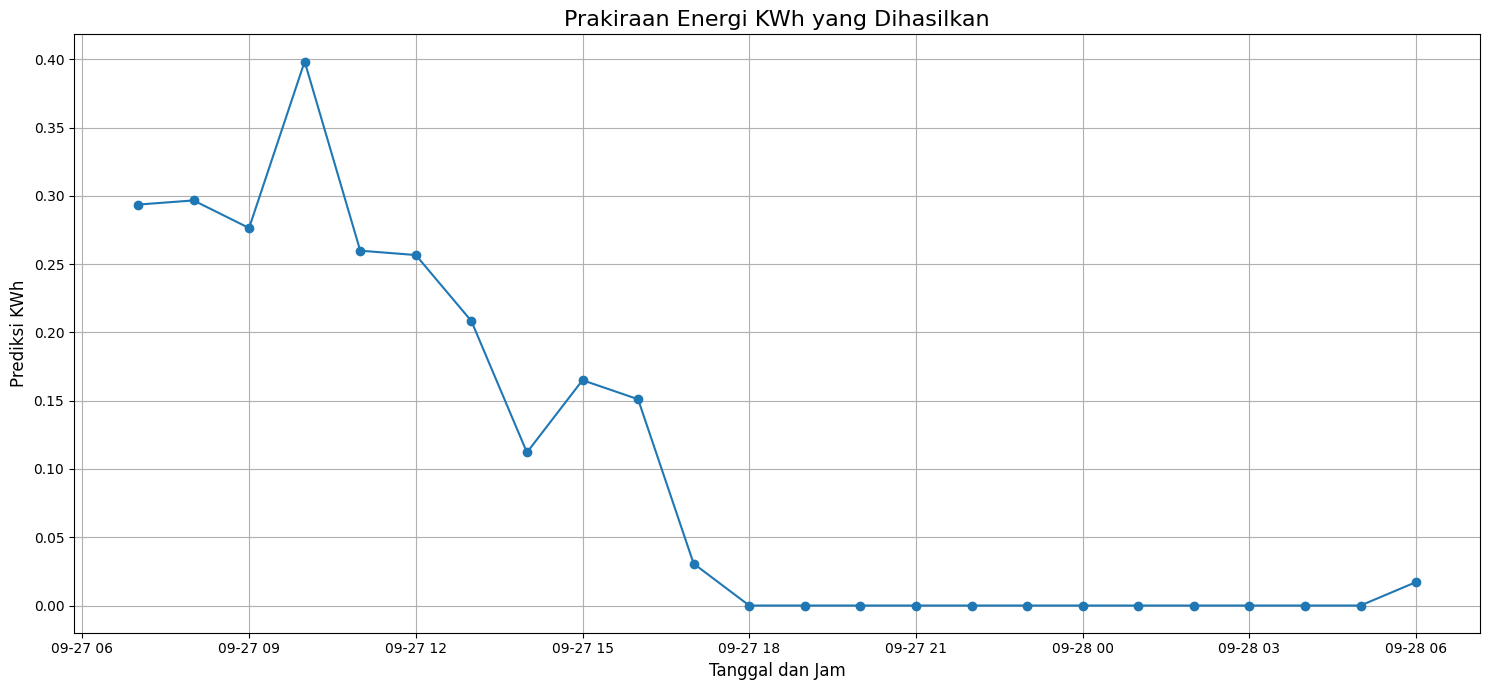

In [37]:
import pandas as pd
import joblib
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


try:
  model = load_model(file_model)
  scaler = joblib.load(file_scaler)
  datetime_prakiraan = pd.to_datetime(prediksi['datetime'])
  features = ['temp', 'humidity','cloudcover','precip','uvindex','bulan', 'jam']
  prediksi_1 = prediksi[features]
  prediksi_scaled = scaler.transform(prediksi_1)
  prediksi_energi = model.predict(prediksi_scaled).flatten()
  hasil_prediksi = pd.DataFrame({
        'Waktu_Prakiraan': datetime_prakiraan,
        'Prediksi_KWh_Dihasilkan': prediksi_energi
  })
  display(hasil_prediksi.head())
  tanggal_start = hasil_prediksi['Waktu_Prakiraan'].min()
    # Tambahkan durasi 24 jam untuk mendapatkan data 1 hari penuh
  tanggal_fin = tanggal_start + pd.Timedelta(hours=24)

  hasil_pred_1 = hasil_prediksi[
   (hasil_prediksi['Waktu_Prakiraan'] >= tanggal_start) &
   (hasil_prediksi['Waktu_Prakiraan'] < tanggal_fin)
    ]
  # Plot hasil prediksi
  plt.figure(figsize=(15, 7))
  plt.plot(hasil_pred_1['Waktu_Prakiraan'], hasil_pred_1['Prediksi_KWh_Dihasilkan'], marker='o', linestyle='-')
  plt.title('Prakiraan Energi KWh yang Dihasilkan', fontsize=16)
  plt.xlabel('Tanggal dan Jam', fontsize=12)
  plt.ylabel('Prediksi KWh', fontsize=12)
  plt.grid(True)
  plt.tight_layout()
  plt.savefig('hasil_prediksi_energi.png')
  print("\nGrafik prediksi berhasil disimpan sebagai 'hasil_prediksi_energi.png'")

except FileNotFoundError as e:
  print(f"❌ ERROR: File tidak ditemukan. Pastikan Anda sudah mengunggah file '{e.filename}' ke sesi Colab Anda.")
except Exception as e:
  print(f"Terjadi error: {e}")


In [38]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Hasil Evaluasi Model pada Data Uji ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f} KWh")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} KWh")
print("---------------------------------------------")

--- Hasil Evaluasi Model pada Data Uji ---
R-squared (R²): 0.9009
Mean Absolute Error (MAE): 0.0404 KWh
Root Mean Squared Error (RMSE): 0.0602 KWh
---------------------------------------------


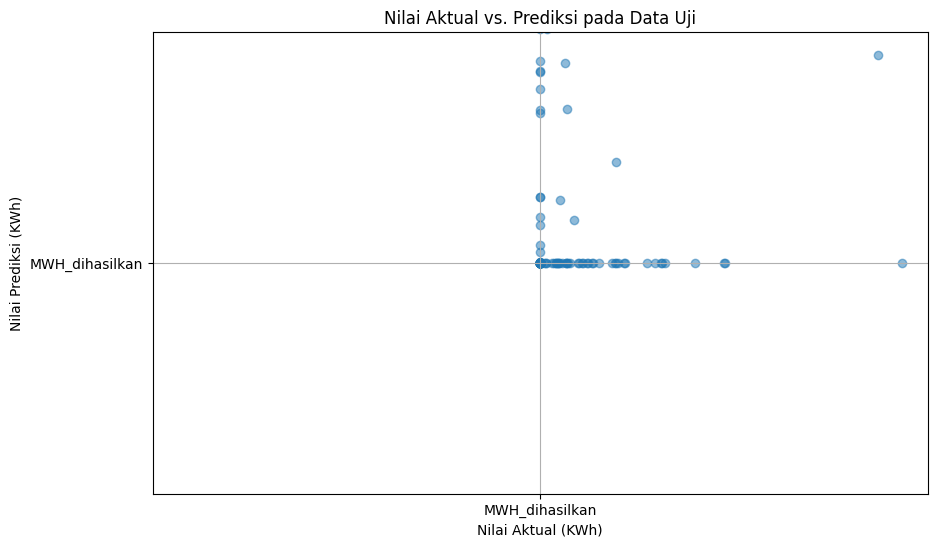

In [39]:
# 4. Buat visualisasi untuk membandingkan nilai aktual vs. prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') # Garis diagonal (prediksi sempurna)
plt.title('Nilai Aktual vs. Prediksi pada Data Uji')
plt.xlabel('Nilai Aktual (KWh)')
plt.ylabel('Nilai Prediksi (KWh)')
plt.grid(True)
plt.savefig('evaluasi_model.png')
plt.show()


Sekitar 86.66% variasi atau perubahan pada data energi yang dihasilkan (MWH_dihasilkan) dapat dijelaskan oleh fitur-fitur (cuaca) dalam model.

MAE : Jika energi aktual yang dihasilkan adalah 0.5 KWh, prediksi model  mungkin berada di antara 0.4565 KWh dan 0.5435 KWh. Ini adalah tingkat kesalahan yang relatif kecil, menunjukkan prediksi yang cukup akurat.

RMSE : meskipun sebagian besar prediksi Anda sangat dekat dengan nilai asli (seperti yang ditunjukkan MAE), sesekali model membuat kesalahan yang sedikit lebih besar. Namun, perbedaannya yang tidak terlalu jauh dari MAE menandakan tidak ada banyak kesalahan prediksi yang ekstrim.

B. PEMODELAN WIND ENERGY

In [40]:
import pandas as pd
import numpy as np
from google.colab import files
import io


hist_df_2 = pd.read_csv('historisdata_Juli-September.csv')
hist_df_2['datetime'] = pd.to_datetime(hist_df_2['datetime'])

hist_df_2['datetime'] = hist_df_2['datetime'] + pd.Timedelta(hours=7)

In [41]:
def get_weather_factor_from_conditions(conditions):
    """Menentukan faktor efisiensi berdasarkan deskripsi cuaca (teks)."""
    if not isinstance(conditions, str): return 1.0
    conditions = conditions.lower()
    if 'rain' in conditions or 'thunderstorm' in conditions: return 0.4
    elif 'overcast' in conditions: return 0.6
    elif 'partly cloudy' in conditions: return 0.8
    elif 'clear' in conditions: return 1.0
    return 1.0

In [42]:
def calculate_wind_power(wind_speed, capacity_kw, cut_in, rated_speed, cut_out):
    """Menghitung output daya (kW) berdasarkan kurva daya turbin sederhana."""
    power_output = np.zeros_like(wind_speed)

    # Antara cut-in dan rated speed, daya sebanding dengan kecepatan pangkat 3
    in_range = (wind_speed >= cut_in) & (wind_speed < rated_speed)
    power_output[in_range] = capacity_kw * ((wind_speed[in_range] - cut_in) / (rated_speed - cut_in)) ** 3

    # Antara rated dan cut-out speed, daya konstan pada kapasitas maksimum
    rated_range = (wind_speed >= rated_speed) & (wind_speed < cut_out)
    power_output[rated_range] = capacity_kw

    # Di luar rentang ini, output adalah 0
    return power_output

In [ ]:
# --- SIMULASI DATA & PARAMETER TURBIN --

In [43]:
# Parameter Turbin Angin
total_capacity_kw = 100.0   # 100 kW
hub_height = 35.0           # 35 meter
reference_height = 10.0     # Ketinggian pengukuran angin standar
wind_shear_exponent = 0.143 # Eksponen untuk daratan terbuka

# Parameter Kurva Daya (contoh umum untuk turbin kelas ini)
cut_in_speed = 3.0    # m/s
rated_wind_speed = 12.0 # m/s
cut_out_speed = 25.0  # m/s

In [44]:
# 1. Hitung Weather Factor dari 'conditions'
hist_df_2['weather_factor'] = hist_df_2['conditions'].apply(get_weather_factor_from_conditions)

# 2. Penyesuaian Kecepatan Angin ke Ketinggian Hub
wind_speed_at_10m = hist_df_2['windspeed'] * (1000/3600) # Asumsi windspeed di data adalah km/j, ubah ke m/s
adjusted_wind_speed = wind_speed_at_10m * (hub_height / reference_height) ** wind_shear_exponent
hist_df_2['adjusted_wind_speed_ms'] = adjusted_wind_speed

# 3. Hitung Basis Daya (kW) dari Kurva Daya Turbin
base_power_kw = calculate_wind_power(
    adjusted_wind_speed,
    total_capacity_kw,
    cut_in_speed,
    rated_wind_speed,
    cut_out_speed
)
hist_df_2['base_power_kw'] = base_power_kw

# 4. Hitung Faktor Efisiensi & Penalti
# a. Penalti Kepadatan Udara (Air Density Penalty)
# Udara lebih panas/tekanan lebih rendah -> kurang padat -> daya lebih kecil
temp_kelvin = hist_df_2['temp'] + 273.15
pressure_pa = hist_df_2['sealevelpressure'] * 100
R_specific = 287.058
air_density = pressure_pa / (R_specific * temp_kelvin)
# Normalisasi (anggap kepadatan standar ISA adalah 1.225 kg/m^3)
density_factor = air_density / 1.225
hist_df_2['density_factor'] = density_factor

# b. Penalti Turbulensi (Turbulence Penalty)
# Hembusan angin (gust) yang jauh lebih tinggi dari kecepatan rata-rata mengurangi efisiensi
turbulence_intensity = (hist_df_2['windgust'] - hist_df_2['windspeed']) / hist_df_2['windspeed']
turbulence_penalty = 1 - np.clip(turbulence_intensity, 0, 0.5) # Batasi penalti maks 50%
hist_df_2['turbulence_penalty'] = turbulence_penalty

# c. Penalti Cuaca Ekstrem (dari weather_factor yang sudah ada)
# Anggap saat badai (thunderstorm), turbin akan berhenti (pitching)
weather_penalty = np.where(hist_df_2['conditions'].str.contains('Thunderstorm'), 0, 1)
hist_df_2['weather_penalty'] = weather_penalty

# 5. Gabungkan semua faktor dan hitung MWH final
# Total efisiensi (tidak termasuk weather_factor umum)
total_efficiency = density_factor * turbulence_penalty * weather_penalty
potential_power_kw = hist_df_2['base_power_kw'] * total_efficiency

# Data per jam, jadi kWh = kW * 1h. MWh = kWh / 1000
mwh_final = potential_power_kw / 1000

# Pastikan tidak ada energi negatif
hist_df_2['MWH_angin_dihasilkan'] = mwh_final.clip(lower=0)

In [45]:
kolom_tampil = [
    'datetime', 'temp','cloudcover','windgust','windspeed','winddir','sealevelpressure', 'adjusted_wind_speed_ms', 'MWH_angin_dihasilkan'
]
print("--- Hasil Generate Dummy Variabel Energi Angin ---")
display(hist_df_2[kolom_tampil].head(10))

--- Hasil Generate Dummy Variabel Energi Angin ---


,datetime,temp,cloudcover,windgust,windspeed,winddir,sealevelpressure,adjusted_wind_speed_ms,MWH_angin_dihasilkan
0,2025-07-14 07:00:00,26.2,100,9.7,14.1,183,1008.7,4.685094,0.000629
1,2025-07-14 08:00:00,28.2,100,8.3,17.6,181,1009.0,5.848061,0.003017
2,2025-07-14 09:00:00,28.6,100,7.6,18.7,169,1008.8,6.213565,0.004328
3,2025-07-14 10:00:00,31.0,27,6.8,21.5,162,1008.2,7.143938,0.009202
4,2025-07-14 11:00:00,31.8,88,7.9,23.2,154,1007.6,7.708808,0.013457
5,2025-07-14 12:00:00,32.2,37,7.6,24.6,148,1007.1,8.173994,0.017820
6,2025-07-14 13:00:00,32.5,49,7.6,21.4,144,1006.4,7.110711,0.008922
7,2025-07-14 14:00:00,32.0,64,8.6,19.8,147,1005.8,6.579069,0.005895
8,2025-07-14 15:00:00,30.7,90,10.4,20.9,151,1005.4,6.944572,0.007922
9,2025-07-14 16:00:00,29.1,99,11.2,23.0,155,1005.8,7.642353,0.012988


In [46]:
hasil_df_2 = hist_df_2[kolom_tampil]
hasil_df_2.to_csv('datawithWind.csv', index=False)

In [47]:
wind_df = pd.read_csv('datawithWind.csv')
wind_df['datetime'] = pd.to_datetime(wind_df['datetime'])
wind_df['tahun'] = wind_df['datetime'].dt.year
wind_df['bulan'] = wind_df['datetime'].dt.month
wind_df['hari'] = wind_df['datetime'].dt.day
wind_df['jam'] = wind_df['datetime'].dt.hour

display(wind_df[['datetime', 'tahun', 'bulan', 'hari', 'jam']].head())

,datetime,tahun,bulan,hari,jam
0,2025-07-14 07:00:00,2025,7,14,7
1,2025-07-14 08:00:00,2025,7,14,8
2,2025-07-14 09:00:00,2025,7,14,9
3,2025-07-14 10:00:00,2025,7,14,10
4,2025-07-14 11:00:00,2025,7,14,11


In [48]:
display(wind_df)

,datetime,temp,cloudcover,windgust,windspeed,winddir,sealevelpressure,adjusted_wind_speed_ms,MWH_angin_dihasilkan,tahun,bulan,hari,jam
0,2025-07-14 07:00:00,26.2,100,9.7,14.1,183,1008.7,4.685094,0.000629,2025,7,14,7
1,2025-07-14 08:00:00,28.2,100,8.3,17.6,181,1009.0,5.848061,0.003017,2025,7,14,8
2,2025-07-14 09:00:00,28.6,100,7.6,18.7,169,1008.8,6.213565,0.004328,2025,7,14,9
3,2025-07-14 10:00:00,31.0,27,6.8,21.5,162,1008.2,7.143938,0.009202,2025,7,14,10
4,2025-07-14 11:00:00,31.8,88,7.9,23.2,154,1007.6,7.708808,0.013457,2025,7,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2025-09-27 02:00:00,25.3,40,14.4,8.0,188,1007.9,2.658210,0.000000,2025,9,27,2
1796,2025-09-27 03:00:00,25.0,16,14.4,7.2,183,1008.0,2.392389,0.000000,2025,9,27,3
1797,2025-09-27 04:00:00,24.6,25,13.0,7.3,189,1008.1,2.425616,0.000000,2025,9,27,4
1798,2025-09-27 05:00:00,24.3,26,13.0,6.7,196,1008.6,2.226251,0.000000,2025,9,27,5


Regresi Linear

In [49]:
# Define X and Ys
X_w = wind_df.drop(["MWH_angin_dihasilkan", 'datetime','tahun','hari'], axis=1)
y_w = wind_df["MWH_angin_dihasilkan"].ravel()

# Train
regresi = LinearRegression()
regresi.fit(X_w,y_w)

# Test
y_pred_w = regresi.predict(X_w)

# accuracy
accuracy_w = regresi.score(X_w,y_w)
print('Accuracy:',accuracy_w*100,'%')

Accuracy: 57.773916321969686 %


In [50]:
regresihasil = pd.DataFrame()
regresihasil['datetime'] = wind_df['datetime']
regresihasil['tahun'] = wind_df['tahun']
regresihasil['bulan'] = wind_df['bulan']
regresihasil['hari'] = wind_df['hari']
regresihasil['jam'] = wind_df['jam']
regresihasil['test'] = y_w
regresihasil['pred'] = y_pred_w
regresihasil = regresihasil.set_index(regresihasil['datetime']).drop('datetime', axis=1)
regresihasil


,tahun,bulan,hari,jam,test,pred
datetime,,,,,,
2025-07-14 07:00:00,2025,7,14,7,0.000629,0.002970
2025-07-14 08:00:00,2025,7,14,8,0.003017,0.004899
2025-07-14 09:00:00,2025,7,14,9,0.004328,0.005434
2025-07-14 10:00:00,2025,7,14,10,0.009202,0.006986
2025-07-14 11:00:00,2025,7,14,11,0.013457,0.007617
...,...,...,...,...,...,...
2025-09-27 02:00:00,2025,9,27,2,0.000000,-0.000213
2025-09-27 03:00:00,2025,9,27,3,0.000000,-0.000612
2025-09-27 04:00:00,2025,9,27,4,0.000000,-0.000412


In [51]:
regresihasil[regresihasil < 0] = 0
regresihasil


,tahun,bulan,hari,jam,test,pred
datetime,,,,,,
2025-07-14 07:00:00,2025,7,14,7,0.000629,0.002970
2025-07-14 08:00:00,2025,7,14,8,0.003017,0.004899
2025-07-14 09:00:00,2025,7,14,9,0.004328,0.005434
2025-07-14 10:00:00,2025,7,14,10,0.009202,0.006986
2025-07-14 11:00:00,2025,7,14,11,0.013457,0.007617
...,...,...,...,...,...,...
2025-09-27 02:00:00,2025,9,27,2,0.000000,0.000000
2025-09-27 03:00:00,2025,9,27,3,0.000000,0.000000
2025-09-27 04:00:00,2025,9,27,4,0.000000,0.000000


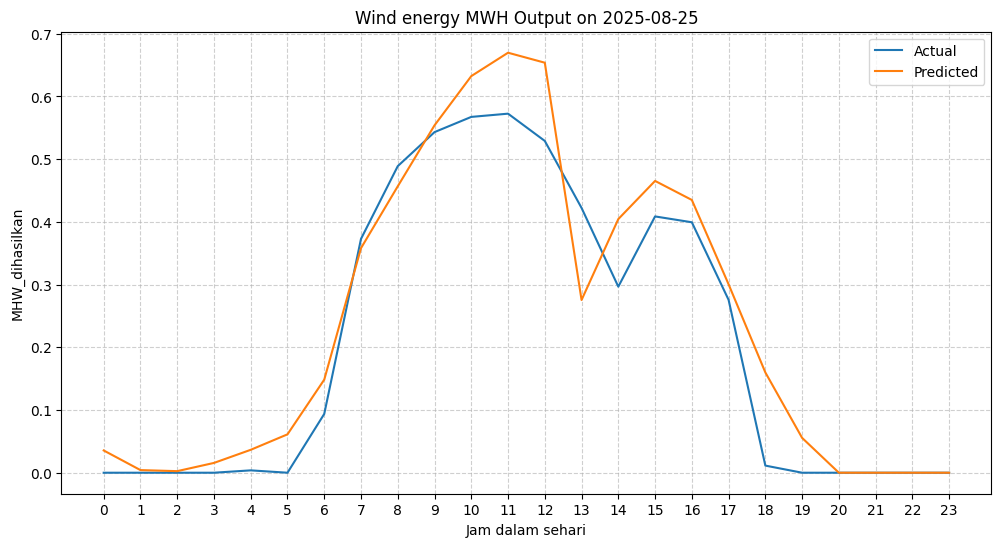

In [52]:
# Plot the test and predicted val
datetime = '2025-08-25'
day_df_w = regresihasil[datetime:datetime]
day_df_w.reset_index(drop=True, inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(day_df['jam'],day_df['test'], label = 'Actual')
plt.plot(day_df['jam'],day_df['pred'], label = 'Predicted')
plt.ylabel('MHW_dihasilkan')
plt.xlabel('Jam dalam sehari')
plt.xticks(day_df['jam'])
plt.title(f'Wind energy MWH Output on {datetime}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("wind_linear_regression")
plt.show()



Akurasi pada Data Latih (3 minggu pertama): 59.99%
Akurasi pada Data Uji (1 minggu terakhir): -67.34%


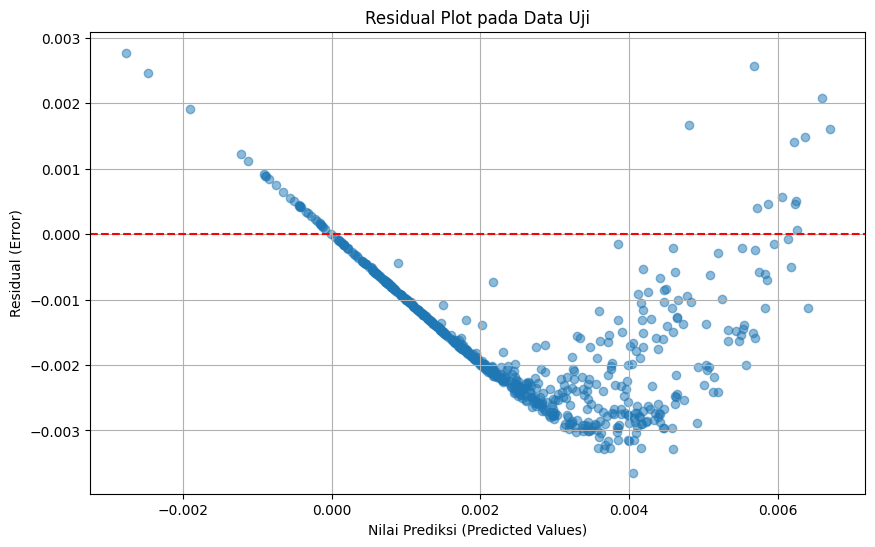

In [53]:
#COBA RIDGE REGRESSION
X_w = wind_df.drop(["MWH_angin_dihasilkan", 'datetime','tahun','hari'], axis=1)
y_w = wind_df["MWH_angin_dihasilkan"].ravel()

split_date = '2025-09-01'
train_indices = wind_df['datetime'] < split_date
test_indices = wind_df['datetime'] >= split_date

X_train_w, X_test_w = X_w[train_indices], X_w[test_indices]
y_train_w, y_test_w = y_w[train_indices], y_w[test_indices]

# 3. LLatih model
regr_val = LinearRegression()
regr_val.fit(X_train_w, y_train_w)

# 4. Evaluasi performa
accuracy_train_w = regr_val.score(X_train_w, y_train_w)
accuracy_test_w = regr_val.score(X_test_w, y_test_w)

print("\n" + "="*50)
print(f"Akurasi pada Data Latih (3 minggu pertama): {accuracy_train_w * 100:.2f}%")
print(f"Akurasi pada Data Uji (1 minggu terakhir): {accuracy_test_w * 100:.2f}%")
print("="*50)

if abs(accuracy_train_w - accuracy_test_w) < 0.05: # Jika selisih < 5%
    print("HASIL VALID: Performa model konsisten. Model tidak overfitting.")
else:
    print("warning: Performa model turun drastis pada data baru. Model mungkin overfitting.")

    # 1. prediksi data uji
y_pred_test_w = regr_val.predict(X_test_w)

# 2.  residual
residuals_w = y_test_w - y_pred_test_w

# 3.  Residual Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_w, residuals_w, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Nilai Prediksi (Predicted Values)")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot pada Data Uji")
plt.grid(True)
plt.show()


In [54]:
# features set

X_nn = solar_df.drop(["MWH_dihasilkan", 'datetime', 'solarradiation','conditions','weather_factor','windgust','windspeed','winddir','sealevelpressure','tahun','hari'], axis=1)
y_nn = solar_df[["MWH_dihasilkan"]]

# Bagi data jd Latih (85%) dan Uji (15%)
X_train_full_nn, X_test_nn, y_train_full_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.15, shuffle=False # shuffle=False PENTING untuk time series
)

# Bagi  data latih lagi jd Latih (70%) dan Validasi (15%)
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
    X_train_full_nn, y_train_full_nn, test_size=0.176, shuffle=False # 0.176 * 0.85 ≈ 0.15
)

# Scaling data
scal = StandardScaler()
# Latih scaler  pada data training
X_train_scaled_nn = scal.fit_transform(X_train_nn)
# Terapkan scaler yang sama
X_val_scaled_nn = scal.transform(X_val_nn)
X_test_scaled_nn = scal.transform(X_test_nn)

# deep neural net
number_in_features = len(X_train_nn.columns)
hidden_nod_layer1 =  number_in_features*5
hidden_nod_layer2 =  number_in_features*4
hidden_nod_layer3 =  number_in_features*3

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nod_layer1, input_dim=number_in_features, activation="relu"))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nod_layer2, activation="relu"))

# Third hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nod_layer3, activation="linear"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Compile the Sequential model
nn_1.compile(loss='mse', optimizer='sgd', metrics=['mse','mae'])

#summary of the model
nn_1.summary()

# Train  model
fit_model_nn = nn_1.fit(X_train_scaled_nn, y_train_nn, epochs=200)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 35)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 28)             │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 21)             │           609 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,919 (7.50 KB)

 Trainable params: 1,919 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0576 - mae: 0.1465 - mse: 0.0576
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0421 - mae: 0.1212 - mse: 0.0421
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0302 - mae: 0.1043 - mse: 0.0302
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219 - mae: 0.0890 - mse: 0.0219
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0175 - mae: 0.0788 - mse: 0.0175
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - mae: 0.0708 - mse: 0.0147
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - mae: 0.0695 - mse: 0.0143
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 - mae: 0.0661 - mse: 0.0125
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 - mae: 0.0654 - mse: 0.0124
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 - mae: 0.0585 - mse: 0.0097
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [55]:
# Predict values for test set

y_pred_2 = nn_1.predict(X_test_scaled_nn)
accuracy_test_2 = r2_score(y_test_nn, y_pred_2)

print("\n" + "="*50)
print(f"Akurasi R-squared Neural Network pada Data Uji: {accuracy_test_2 * 100:.2f}%")
print("="*50)

test_index_nn = y_test_nn.index
test_df_corr = wind_df.loc[test_index_nn].copy()

# 1. Ambil baris data asli yang termasuk dalam set Uji
test_df_nn = solar_df[test_indices].copy()

nn_results_2 = pd.DataFrame(index=test_df_corr.index)
nn_results_2['datetime'] = wind_df['datetime']
nn_results_2['jam'] = test_df_corr['jam']
nn_results_2['test'] = y_test_nn
nn_results_2['pred'] = y_pred_2.flatten()

# 3. Set 'datetime' sebagai index agar bisa difilter berdasarkan tanggal
nn_results_2 = nn_results_2.set_index('datetime')

print("DataFrame 'nn_results' berhasil dibuat:")
print(nn_results_2.head())


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Akurasi R-squared Neural Network pada Data Uji: 85.86%
DataFrame 'nn_results' berhasil dibuat:
                     jam  test      pred
datetime                                
2025-09-16 01:00:00    1   0.0  0.062009
2025-09-16 02:00:00    2   0.0  0.040112
2025-09-16 03:00:00    3   0.0  0.024338
2025-09-16 04:00:00    4   0.0  0.009691
2025-09-16 05:00:00    5   0.0  0.015115



Membuat plot untuk tanggal: 2025-09-16...


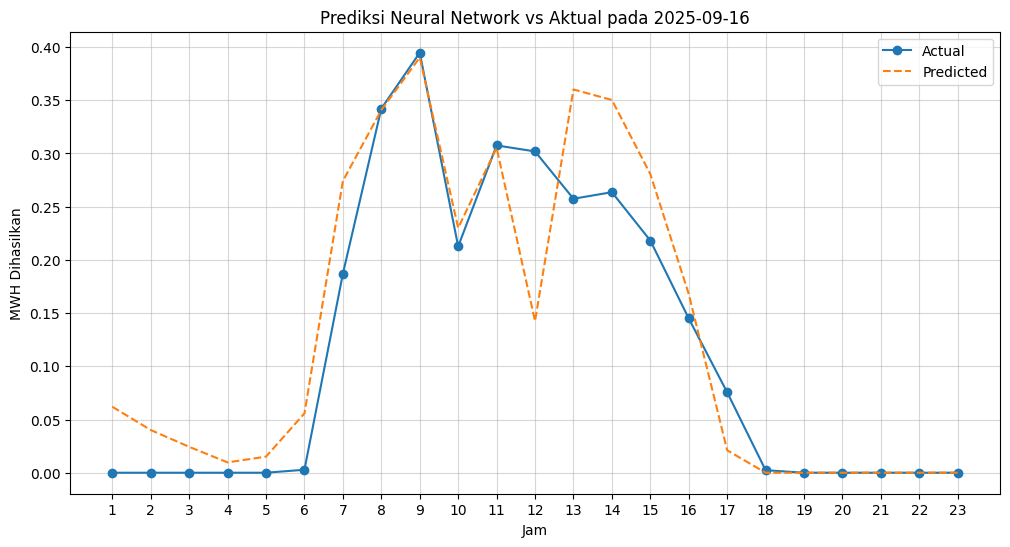

In [56]:
waktu = '2025-09-16'
try:
    day_df_nn = nn_results_2.loc[waktu]

    if not day_df_nn.empty:
        print(f"\nMembuat plot untuk tanggal: {waktu}...")

        plt.figure(figsize=(12, 6))
        plt.plot(day_df_nn['jam'], day_df_nn['test'], label = 'Actual', marker='o')
        plt.plot(day_df_nn['jam'], day_df_nn['pred'], label = 'Predicted', linestyle='--')

        plt.ylabel('MWH Dihasilkan')
        plt.xlabel('Jam')
        plt.xticks(day_df_nn['jam'])
        plt.title(f'Prediksi Neural Network vs Aktual pada {waktu}')
        plt.legend()
        plt.grid(True, alpha=0.5)
        plt.savefig('solar_neural_network')
        plt.show()
    else:
        print(f"\nTidak ada data yang ditemukan untuk tanggal {waktu}.")

except KeyError:
    print(f"\nERROR: Tanggal {waktu} tidak ditemukan di dalam indeks data uji.")

In [57]:
import joblib # Impor library joblib
nn_1.save('model_prediksi_wind.keras')
joblib.dump(scal, 'scal.pkl')


['scal.pkl']

Prediksi energi wind 7 hari kedepan..

In [58]:
file_mod = 'model_prediksi_wind.keras'
file_scal = 'scal.pkl'
prediksi_1 = pd.read_csv('prakiraan_cuaca.csv')
prediksi_1['datetime'] = pd.to_datetime(prediksi_1['datetime'])
prediksi_1['datetime'] = pd.to_datetime(prediksi_1['datetime'])
prediksi_1['tahun'] = prediksi_1['datetime'].dt.year
prediksi_1['bulan'] = prediksi_1['datetime'].dt.month
prediksi_1['hari'] = prediksi_1['datetime'].dt.day
prediksi_1['jam'] = prediksi_1['datetime'].dt.hour


,datetime,tahun,bulan,hari,jam
0,2025-09-27 07:00:00,2025,9,27,7
1,2025-09-27 08:00:00,2025,9,27,8
2,2025-09-27 09:00:00,2025,9,27,9
3,2025-09-27 10:00:00,2025,9,27,10
4,2025-09-27 11:00:00,2025,9,27,11


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Waktu_Perkiraan,Prediksi_KWh_Dihasilkan
0,2025-09-27 07:00:00,0.291262
1,2025-09-27 08:00:00,0.300599
2,2025-09-27 09:00:00,0.303395
3,2025-09-27 10:00:00,0.365221
4,2025-09-27 11:00:00,0.249372



Grafik prediksi berhasil disimpan sebagai 'hasil_prediksi_energi.png'


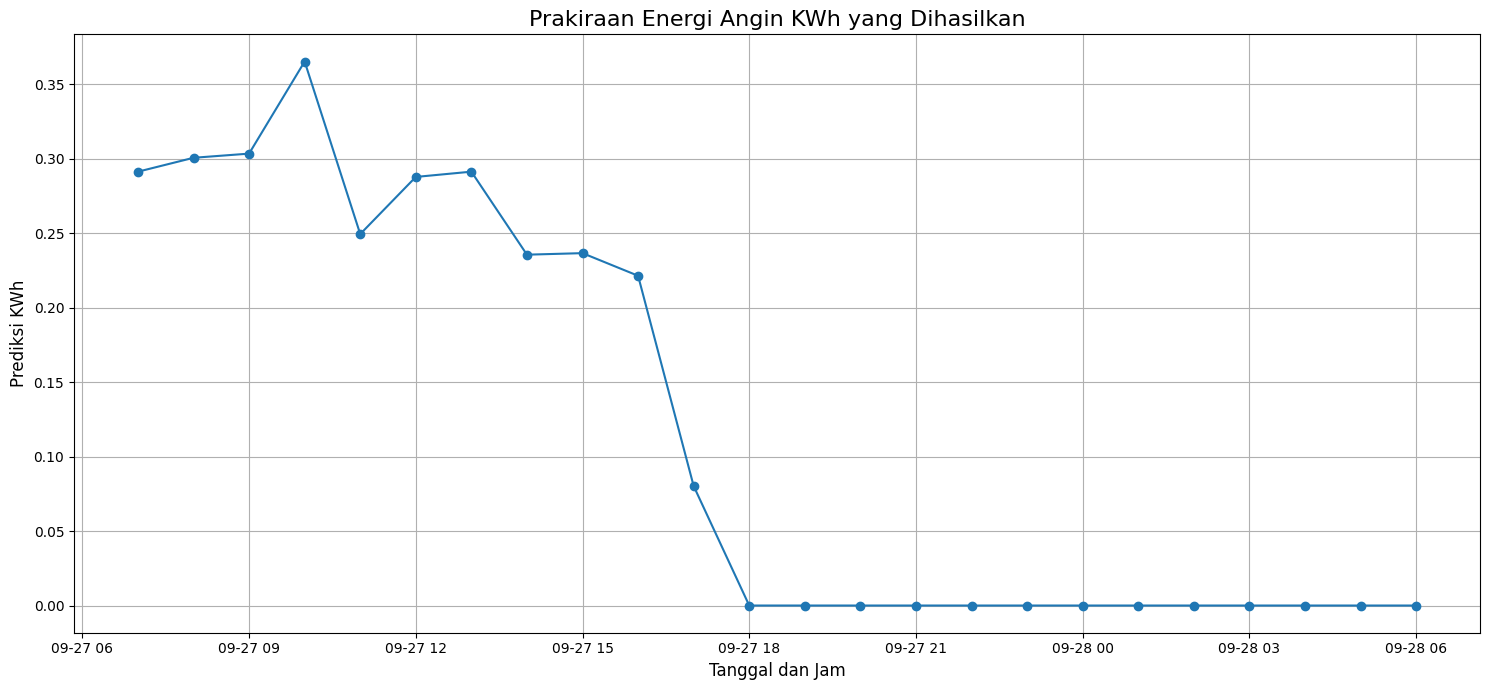

In [59]:
display(prediksi_1[['datetime', 'tahun', 'bulan', 'hari', 'jam']].head())
import pandas as pd
import joblib
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

try:
  mod = load_model(file_mod)
  scal = joblib.load(file_scal)
  datetime_perkiraan = pd.to_datetime(prediksi_1['datetime'])
  feature = ['temp', 'humidity','cloudcover','precip','uvindex','bulan', 'jam']
  prediksi_2 = prediksi_1[feature]
  prediksi_scal = scal.transform(prediksi_2)
  prediksi_en = mod.predict(prediksi_scal).flatten()
  hasil_pred = pd.DataFrame({
        'Waktu_Perkiraan': datetime_perkiraan,
        'Prediksi_KWh_Dihasilkan': prediksi_en
  })
  display(hasil_pred.head())

  tanggal_mulai = hasil_pred['Waktu_Perkiraan'].min()
    # Tambahkan durasi 24 jam untuk mendapatkan data 1 hari penuh
  tanggal_akhir = tanggal_mulai + pd.Timedelta(hours=24)

  hasil_pred_1_hari = hasil_pred[
   (hasil_pred['Waktu_Perkiraan'] >= tanggal_mulai) &
   (hasil_pred['Waktu_Perkiraan'] < tanggal_akhir)
    ]
  # Plot hasil prediksi
  plt.figure(figsize=(15, 7))
  plt.plot(hasil_pred_1_hari['Waktu_Perkiraan'], hasil_pred_1_hari['Prediksi_KWh_Dihasilkan'], marker='o', linestyle='-')
  plt.title('Prakiraan Energi Angin KWh yang Dihasilkan', fontsize=16)
  plt.xlabel('Tanggal dan Jam', fontsize=12)
  plt.ylabel('Prediksi KWh', fontsize=12)
  plt.grid(True)
  plt.tight_layout()
  plt.savefig('hasil_pred_energi_angin.png')
  print("\nGrafik prediksi berhasil disimpan sebagai 'hasil_prediksi_energi.png'")

except FileNotFoundError as e:
  print(f"❌ ERROR: File tidak ditemukan. Pastikan Anda sudah mengunggah file '{e.filename}' ke sesi Colab Anda.")
except Exception as e:
  print(f"Terjadi error: {e}")



In [60]:
# --- 1. Impor Library ---
!pip install -q xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import xgboost as xgb # Impor XGBoost
from IPython.display import display

# --- 2. Pembuatan & Feature Engineering Data Dummy (Sama seperti sebelumnya) ---
print("--- 1. Membuat & Memproses Data Dummy ---")
num_days = 500
dates = pd.to_datetime(pd.date_range(start='2023-01-01', periods=num_days, freq='D'))
df = pd.DataFrame({'datetime': dates,
                   'feedstock_kg': np.random.uniform(800, 1200, num_days),
                   'digester_temp_c': np.random.uniform(35, 40, num_days),
                   'digester_ph': np.random.uniform(6.8, 7.2, num_days)})
# Tambahkan ini di bagian Feature Engineering (Langkah 2)

# Fitur Interaksi 1: Jarak suhu dari titik optimal
optimal_temp = 37.5
df['temp_deviation'] = (df['digester_temp_c'] - optimal_temp).abs()

# Fitur Interaksi 2: Gabungan feedstock dengan deviasi suhu
df['feedstock_x_temp_dev'] = df['feedstock_kg'] * df['temp_deviation']
# Membuat pola non-linear yang lebih kuat untuk dipelajari model
temp_effect = 1 + np.sin((df['digester_temp_c'] - 35) / 5 * 2 * np.pi) * 0.1
df['biogas_yield_m3'] = (df['feedstock_x_temp_dev'] * 0.5 * temp_effect) + np.random.normal(0, 30, num_days)
df['biogas_yield_m3'] = df['biogas_yield_m3'].clip(lower=50)

# Feature Engineering
df['yield_lag_1_day'] = df['biogas_yield_m3'].shift(1)
df['feedstock_kg_rolling_7d'] = df['feedstock_kg'].rolling(window=7).mean()
df['day_of_year'] = df['datetime'].dt.dayofyear
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)
df = df.dropna()

# --- 3. Persiapan Model ---
print("\n--- 2. Mempersiapkan Data untuk Model XGBoost ---")
features = ['feedstock_kg', 'digester_temp_c', 'digester_ph', 'yield_lag_1_day',
            'feedstock_kg_rolling_7d', 'day_of_year_sin', 'day_of_year_cos']
target = 'biogas_yield_m3'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Pelatihan Model XGBoost ---
print("\n--- 3. Melatih Model XGBoost ---")
# Buat model XGBoost Regressor
xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgboost_model.fit(X_train, y_train)
print("Model XGBoost selesai dilatih.")

# --- 5. Evaluasi Model ---
print("\n--- 4. Mengevaluasi Performa Model XGBoost ---")
y_pred = xgboost_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Performa model BARU (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f} m³")

--- 1. Membuat & Memproses Data Dummy ---

--- 2. Mempersiapkan Data untuk Model XGBoost ---

--- 3. Melatih Model XGBoost ---
Model XGBoost selesai dilatih.

--- 4. Mengevaluasi Performa Model XGBoost ---
Performa model BARU (R²): 0.9909
Mean Absolute Error (MAE): 29.0784 m³


In [63]:
!jupyter nbconvert --to html "MLRNEGiliKetapang.ipynb"

[NbConvertApp] WARNING | pattern 'MLRNEGiliKetapang.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execu